In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import os

In [9]:
os.listdir()

['.ipynb_checkpoints', 'orders.xlsx', 'products.xlsx', 'Samokat.ipynb']

In [119]:
orders = pd.read_excel('orders.xlsx')
orders.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130


In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3323 non-null   int64         
 1   accepted_at    3323 non-null   datetime64[ns]
 2   product_id     3323 non-null   int64         
 3   quantity       3323 non-null   int64         
 4   regular_price  3323 non-null   int64         
 5   price          3323 non-null   int64         
 6   cost_price     3323 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 181.9 KB


In [21]:
orders.isna().any()

order_id         False
accepted_at      False
product_id       False
quantity         False
regular_price    False
price            False
cost_price       False
dtype: bool

In [121]:
products = pd.read_excel('products.xlsx')
products.head()

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio


In [25]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  40152 non-null  int64 
 1   level1      40152 non-null  object
 2   level2      40152 non-null  object
 3   name        39940 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [27]:
products.isna().any()

product_id    False
level1        False
level2        False
name           True
dtype: bool

In [29]:
products[products['name'].isna()]

,product_id,level1,level2,name
821,822,Безалкогольные напитки,Воды питьевые,NaN
1372,1373,Сыры,Мягкие сыры,NaN
2439,2442,Бытовая химия,Средства для уборки,NaN
3277,3281,Гигиена,Средства личной гигиены,NaN
3440,3444,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,NaN
...,...,...,...,...
39801,104104,"Кофе, какао",Кофе,NaN
39866,104714,Безалкогольные напитки,Напитки,NaN
40057,107597,Рынок,Рынок.Сыры,NaN
40065,107897,Молочная продукция,Кисломолочные традиционные продукты,NaN


In [123]:
df = orders.merge(products, left_on='product_id', right_on='product_id', suffixes=('o', 'p'))
df.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат


По какой категории товаров продано больше всего позиций?

Подкрепите свой ответ таблицей, в которой рассчитано количество проданных штук товара в каждой товарной категордателю.

In [129]:
agg_by_cat = df.groupby('level1')['quantity'].agg(cnt='count').reset_index().sort_values(by='cnt', ascending=False)
agg_by_cat

,level1,cnt
1,Безалкогольные напитки,363
11,Молочная продукция,357
19,Свежие овощи,245
10,Кулинария,226
0,Бакалея,189
25,Хлеб и хлебобулочные изделия,189
21,Снэки,178
20,Свежие фрукты,168
6,Замороженная продукция,136
12,Мучные кондитерские изделия,116


Дополнительно постройте на основании этой таблицы barchart.

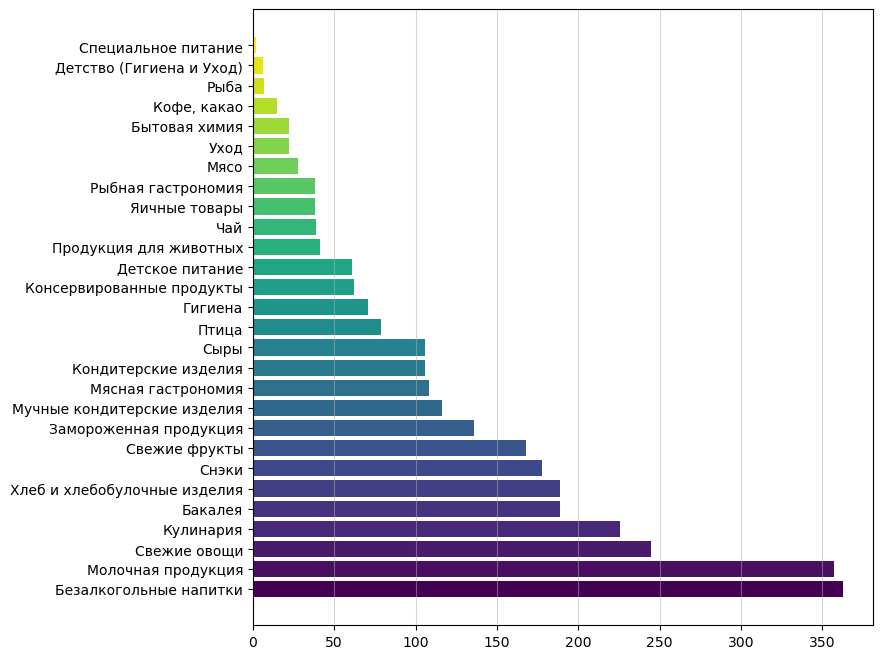

In [131]:
fig = plt.figure(figsize=(8,8))

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(agg_by_cat['level1'])))

plt.barh(agg_by_cat['level1'], agg_by_cat['cnt'], color=colors)
plt.grid(axis='x', alpha=0.5)

Оцените распределение количества проданных позиций в каждой товарной категории (level1) по подкатегориям (level2). Проиллюстрируйте свой результат расчетной таблицей.

In [133]:
agg_by_cat_subcat = df.groupby(['level1', 'level2'])['quantity'].agg(cnt='count').reset_index().sort_values(ascending=False, by=['level1', 'cnt'])
agg_by_cat_subcat

,level1,level2,cnt
99,Яичные товары,Яйцо куриное,38
98,Чай,Черный чай,25
96,Чай,Зеленый чай,7
97,Чай,Чайные напитки,7
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,189
...,...,...,...
7,Бакалея,Растительные масла,13
5,Бакалея,Мука и мучные смеси,12
2,Бакалея,Ингредиенты для готовки,10
0,Бакалея,Все для суши,8


Какой средний чек был 13.01.2022?

In [180]:
day_sales = df[df['accepted_at'].dt.date==pd.to_datetime('2022-01-13').date()]
day_cheques = day_sales['price']*day_sales['quantity']

In [188]:
avg_cheq = day_cheques.mean()
avg_cheq.round(2)

148.05

Когда товар продается по промо-акции, его базовая цена не совпадает с фактической ценой.

Вам необходим


Посчитать, какую долю от общих продаж категории Сыры занимают промо (в штках)

Построить пайчарт, который это проиллюстрирует. На графике должны быть видны группы, соответствующие доли и понятные подписи к ним.

In [214]:
df_promo = df.loc[(df['level1']=='Сыры') & ~(df['price']==df['regular_price']), 'quantity'].sum()
df_not_promo = df.loc[(df['level1']=='Сыры') & (df['price']==df['regular_price']), 'quantity'].sum()

Text(0.5, 1.0, 'Доля промоакций в категории "Сыры"')

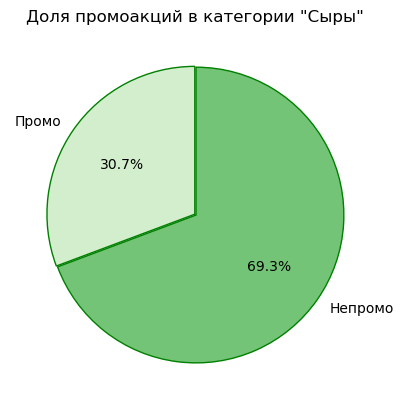

In [270]:
data = [df_promo, df_not_promo]

cmap = plt.cm.Greens([0.2, 0.5])

plt.pie(data,
        labels=['Промо', 'Непромо'],
       startangle=90,
       autopct='%1.1f%%',
       colors=cmap,
       explode=[0, 0.01],
       wedgeprops={'edgecolor':'green'})

plt.title('Доля промоакций в категории "Сыры"', color='black')

Нужно посчитать маржу:
- В рублях
- В %
Сделать это нужно по всем категориям level1 и отобразить с помощью 2 горизонтальных барчартов. Все подписи должны быть читаемыми и понятными.

In [325]:
agg_by_cat_marja = df.groupby('level1').apply(lambda x:
                             pd.Series({
                                 'маржа, руб.': (x['price']-x['cost_price']).sum(),
                                 'маржа, %': ((x['price']-x['cost_price']).sum()/x['price'].sum()).round(2)
                             })).reset_index().sort_values(by='маржа, руб.', ascending=True)
agg_by_cat_marja

C:\Users\alche\AppData\Local\Temp\ipykernel_13588\977149647.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,level1,"маржа, руб.","маржа, %"
22,Специальное питание,208.0,0.51
5,Детство (Гигиена и Уход),517.0,0.30
15,Продукция для животных,674.0,0.28
27,Яичные товары,737.0,0.18
17,Рыба,808.0,0.28
24,Уход,1039.0,0.26
4,Детское питание,1272.0,0.37
2,Бытовая химия,1420.0,0.26
14,Мясо,2085.0,0.27
18,Рыбная гастрономия,2570.0,0.36


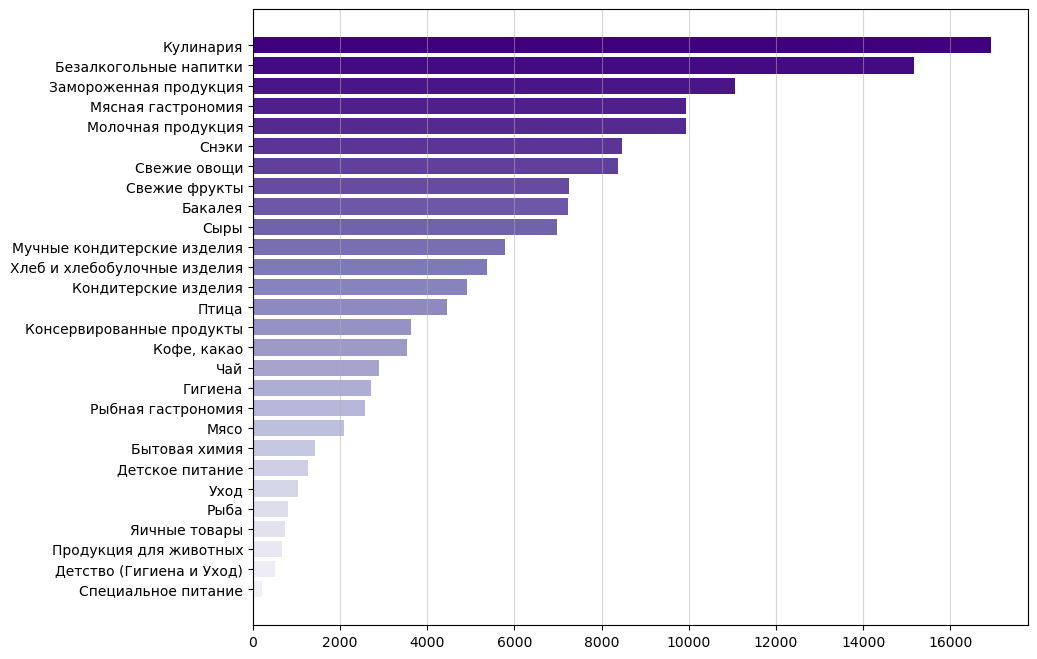

In [380]:
agg_by_cat_marja.sort_values(by='маржа, руб.', inplace=True)
plt.figure(figsize=(10,8))
cmap = plt.cm.Purples(np.linspace(0.1, 1, len(agg_by_cat_marja['level1'])))
plt.barh(agg_by_cat_marja['level1'],
         agg_by_cat_marja['маржа, руб.'],
        color=cmap);
plt.grid(axis='x', alpha=0.5);

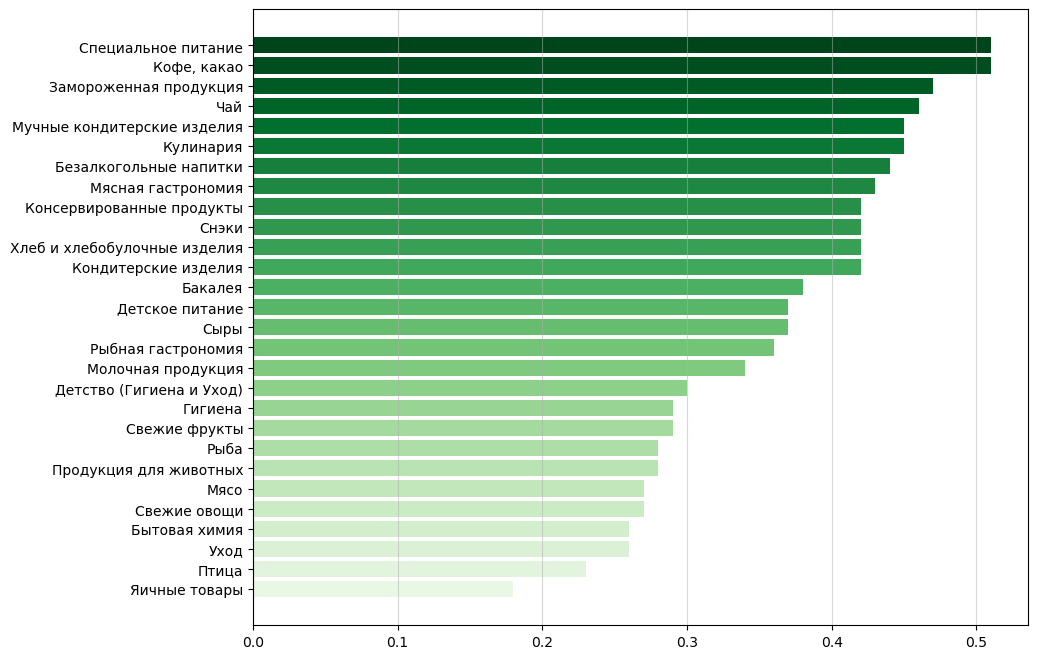

In [378]:
agg_by_cat_marja.sort_values(by='маржа, %', inplace=True)
plt.figure(figsize=(10,8))
cmap = plt.cm.Greens(np.linspace(0.1, 1, len(agg_by_cat_marja['level1'])))
plt.barh(agg_by_cat_marja['level1'],
         agg_by_cat_marja['маржа, %'],
        color=cmap);
plt.grid(axis='x', alpha=0.5);

Сделайте ABC-анализ продаж по количеству

Сделайте ABC-анализ по сумме продаж

Сделайте новый столбец, в кото|ром будет итоговая группа на основании двух анализов. Например: A C.

In [412]:
sales_value = (df['quantity']*df['price']).sum()
agg_by_subc = df.groupby('level2').apply(lambda x: pd.Series({
    'qnt': x['quantity'].sum()/df['quantity'].sum(),
    'sales': (x['quantity']*x['price']).sum()/sales_value
})).reset_index()

C:\Users\alche\AppData\Local\Temp\ipykernel_13588\3378810274.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [415]:
agg_by_subc.sort_values(by='qnt', inplace=True, ascending=False)
agg_by_subc['qnt_cs'] = agg_by_subc['qnt'].cumsum()
agg_by_subc['qnt_abc'] = np.where(agg_by_subc['qnt_cs']<=0.8, 'A', np.where(agg_by_subc['qnt_cs']<=0.95, 'B', 'C'))
agg_by_subc

,level2,qnt,sales,qnt_cs,qnt_abc
51,Напитки,0.067524,0.053990,0.067524,A
10,Готовые блюда,0.066452,0.090322,0.133976,A
92,Хлеб и хлебобулочные изделия,0.058414,0.032954,0.192390,A
72,Снэки соленые,0.048232,0.038704,0.240622,A
6,Воды питьевые,0.043408,0.020459,0.284030,A
...,...,...,...,...,...
55,Освежители воздуха,0.000536,0.001271,0.998392,C
9,Готовая еда Самокат,0.000536,0.001083,0.998928,C
14,Диетическое питание,0.000536,0.000918,0.999464,C
77,Средства для сантехники,0.000268,0.000535,0.999732,C


In [423]:
agg_by_subc.sort_values(by='sales', inplace=True, ascending=False)
agg_by_subc['sales_cs'] = agg_by_subc['sales'].cumsum()
agg_by_subc['sales_abc'] = np.where(agg_by_subc['sales_cs']<=0.8, 'A', np.where(agg_by_subc['sales_cs']<=0.95, 'B', 'C'))
agg_by_subc['general_abc'] = agg_by_subc['qnt_abc']+agg_by_subc['sales_abc']
agg_by_subc[['level2', 'qnt_abc', 'sales_abc', 'general_abc']]

,level2,qnt_abc,sales_abc,general_abc
10,Готовые блюда,A,A,AA
51,Напитки,A,A,AA
50,Мясо птицы охлажденное,A,A,AA
85,"Тепличные овощи, грибы",A,A,AA
72,Снэки соленые,A,A,AA
...,...,...,...,...
77,Средства для сантехники,C,C,CC
24,"Какао, горячий шоколад",C,C,CC
91,Уход за одеждой и обувью,C,C,CC
57,Первая помощь,C,C,CC


In [425]:
os.listdir()

['.ipynb_checkpoints', 'orders.xlsx', 'products.xlsx', 'Samokat.ipynb']

In [427]:
import zipfile

In [429]:
with zipfile.ZipFile('Samokat.zip', 'w') as zipf:
    zipf.write('Samokat.ipynb')